# Sentiment Analysis 

Import of required packages.

In [1]:
!pip install wordcloud

     |████████████████████████████████| 368kB 5.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from textblob import TextBlob as txt
import nltk as nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Creating and mini - cleaning the Data Frame


In [3]:
df = pd.read_csv('file.csv',sep=',')#Import of Data-Set
df.drop(['id','keys','imageURLs','asins'],axis=1,inplace=True)  # Dropping unnecessary Columns

####  With the aid of the package called 'Textblob' we can add 2 new columns to our Data Frame. The column 'Polarity Ratings' will describe the overall polarity of the Review text. The polarity is standardized between - 1 to 1. 
#### Which stands for very negative up to very positive, respectively.


In [4]:
polarity = [ txt(x).sentiment.polarity for x in df['reviews.text']]   # Using Textblob to analyse polarity of every review
df['polarity'] = polarity  # Adding every polarity to Data Frame
opinion = [ txt(x).sentiment.subjectivity for x in df['reviews.text']] # Using Textblob to analyze subjectivity of every review.
df['subjectivity'] = opinion   # 

The next step is optional. This line of code alters the columns. So, that one can read the whole review.

In [53]:
# Defining Function that cleans a string
def cleanText(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Defining a funtion that cleans the Text of Stopwords, which do not have any additional meaning in the language.
def cleanStopWords(text):
    #Defining the english stop words:
    stopWords = set(stopwords.words('english'))
    textSplitted = text.split(' ')
    cleanedText = ''
    for element in textSplitted:
        if element not in stopWords:
            cleanedText = cleanedText + ' ' + element
    return cleanedText
# Defining Function to create a wordcloud
def wordCloudCreation (text,title=''):
    text_string = ''
    for element in text:
        text_string= text_string + ' ' + element
    stop_words = set(stopwords.words('english'))
    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",collocations = False,
               max_font_size=150, random_state=42)
    
    wc.generate(text_string)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(title+'\n')
    plt.show()

#Defining a Function which returns the most common words in a data series.
def wholeReviewTextFromSeries(text):
    wholeReview = ''
    for element in text:
        wholeReview = wholeReview + ' ' + element
    return Counter(wholeReview.split()).most_common()


In [6]:
#Cleaning the reviews and adding the cleaned reviews to the data Frame

ReviewTextCleaned = [cleanText(x) for x in df['reviews.text']]
df['reviewTextCleaned'] = ReviewTextCleaned
df['reviewTextCleanedNoStopWords'] = [cleanStopWords (x) for x in df['reviewTextCleaned']]


#Calculating the Polarity & Subjectivity

polarityCleaned = [ txt(x).sentiment.polarity for x in df['reviewTextCleaned']]   # Using Textblob to analyse polarity of every review
df['polarityCleaned'] = polarityCleaned  # Adding every polarity to Data Frame

opinionCleaned = [ txt(x).sentiment.subjectivity for x in df['reviewTextCleaned']] # Using Textblob to analyze subjectivity of every review.
df['subjectivityCleaned'] = opinionCleaned

polarityCleanednoStopWords = [ txt(x).sentiment.polarity for x in df['reviewTextCleaned']]   # Using Textblob to analyse polarity of every review
df['polarityCleanedNoStopWords'] = polarityCleanednoStopWords  # Adding every polarity to Data Frame

opinionCleanedNoStopWords = [ txt(x).sentiment.subjectivity for x in df['reviewTextCleaned']] # Using Textblob to analyze subjectivity of every review.
df['subjectivityCleanedNoStopWords'] = opinionCleanedNoStopWords 

In [7]:
# Polarity & Subjectivity Ratings round to 2 digits after the comma
df['polarity'] = df['polarity'].apply(lambda x :round(x,2))
df['subjectivity'] = df['subjectivity'].apply(lambda x: round(x,2))
df['polarityCleaned'] = df['polarityCleaned'].apply(lambda x :round(x,2)) 
df['subjectivityCleaned'] = df['subjectivityCleaned'].apply(lambda x :round(x,2))
df['polarityCleanedNoStopWords'] = df['polarityCleanedNoStopWords'].apply(lambda x :round(x,2)) 
df['subjectivityCleanedNoStopWords'] = df['subjectivityCleanedNoStopWords'].apply(lambda x :round(x,2))


In [47]:
# New Analysis about Stars and negative Polarity to find out which reviews have a good rating but a negative polarity
pd.set_option('display.max_colwidth', -1)
df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']< -0.4]


,reviews.rating,polarityCleanedNoStopWords,reviewTextCleaned
561,3,-0.75,im disappointed sometimes gives doesnt understand
1698,5,-0.50,my son is obsessed with his kids kindle a must have so they stay off your phone
2074,2,-0.52,not sure why but it kept freezing and ended up having to return it very disappointing
2332,5,-0.67,i got this because it is almost impossible to break
2696,4,-0.54,it works well for me however my wife seems to have cold fingers and the touch screen does not always respond one other odd quirk if the tablet is turned off and you plug it in to charge it it automatically turns on you then have to wait until it boots and then turn it off again this is very annoying before recommending to someone i would tell them about this annoying quirk
2710,1,-0.52,i i thought the buy for my child bc the kids mode but it was very poor
2786,3,-0.50,it is difficult to understand the instructions i am still working on it
2953,2,-0.50,kindle screen failed had to reboot often customer service couldnt fix replaced one screen reboots often customer service offered replace just want one that works cant get upgrade replacement
3002,4,-0.65,if you want to listen to music you will have to sign for amazon unlimited or prime which is very expensive pandora does not work too well with this device as it does with google home
3040,5,-0.65,was very difficult to set up with the hours help of geek squad and my granddaughters iphone we got it done


As we seen in the cell above, there are some entries in the data set where a rather negative polarity was calculated despite the good rating of 3+. One could argue, that the algorithm used to describe/calculate the polarity might need some fine-tuning.

# Explorative Analysis
## Looking at the Top 1000 Most positive and negative reviews to find out what the customers thinks is positive or negative about the product, respectively.


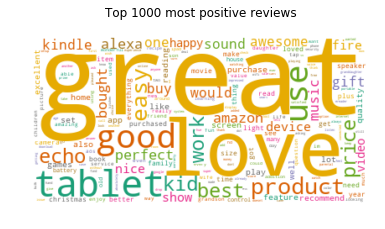

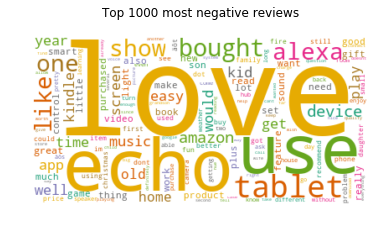

(None, None)

In [55]:
# Starting with Top 1000 Polarity 
TopDfSorted = df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']> 0.5].iloc[:1000].sort_values('polarityCleanedNoStopWords',ascending = False )
BottomDfSorted = df[['reviews.rating','polarityCleanedNoStopWords','reviewTextCleaned']].loc[df['polarityCleanedNoStopWords']< .3].iloc[:1000].sort_values('polarityCleanedNoStopWords',ascending = True )

wordCloudCreation(TopDfSorted['reviewTextCleaned'],'Top 1000 most positive reviews'),wordCloudCreation(BottomDfSorted['reviewTextCleaned'],'Top 1000 most negative reviews')


### As one can see, the Top 1000 most positive reviews as well as the Top 1000 most negative reviews have very many words in common.
#### A further analysis, to find the real difference is to look at each written word, calculate the polarity of each word and plot the most negative and most positive words separately as well, respectively.

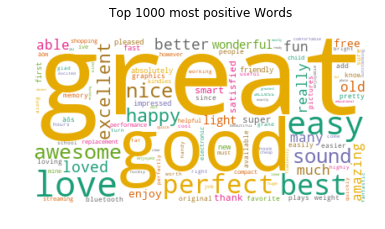

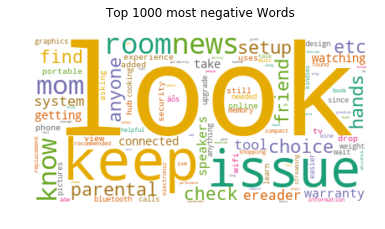

(None, None)

In [58]:
text = wholeReviewTextFromSeries(TopDfSorted['reviewTextCleaned'])
textAsDataFrame = pd.DataFrame(text,columns= ['Word','Counter'])
polarity = [txt(x).sentiment.polarity for x in textAsDataFrame['Word'] ]
textAsDataFrame['Polarity'] = polarity
words = ''
wordsNegative = ''
textAsDataFrame['Words'] = (textAsDataFrame['Word']+' ')*textAsDataFrame['Counter'].astype(int) # easy way to get all the words for the wordcloud :D
DataFrameToDraw=textAsDataFrame.sort_values('Polarity',ascending= False).iloc[:1000]
DataFrameToDrawNegative=textAsDataFrame.sort_values('Polarity',ascending= True).iloc[:1000]
for element in DataFrameToDraw['Words']:
    words = words + ' '+ element
for element in DataFrameToDrawNegative['Words']:
    wordsNegative = wordsNegative + ' ' + element 
    
    
    
words = words.split() #Converting into list for Wordclouds
wordsNegative = wordsNegative.split()
wordCloudCreation(words,'Top 1000 most positive Words'),wordCloudCreation(wordsNegative,'Top 1000 most negative Words')  

#topDfSortedPolarity1 = pd.DataFrame(text,columns =['Words','Counter','Polarity']) # Create Data Frame to Sort_Values.

    


  &#x25B2; as the two Wordclouds show ... do not see a significant change in 'tone' considering the words in the negative camp compared to the positive  